**Importiere die notwendigen Packages**

In [1]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [2]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bev_bestand_vornamen_jahrgang_geschlecht_od3701

In [3]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/DWH/bev_bestand_vornamen_jahrgang_geschlecht_OD3701/BEV370OD3701.csv"
# Auf INTEG
#fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bev_bestand_vornamen_jahrgang_geschlecht_OD3701/BEV370OD3701.csv"


# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [4]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [5]:
data2betested.head(3)

,Jahrgang,Vorname,SexLang,AnzBestWir
0,2020,Aaliyah,weiblich,2
1,2020,Abigail,weiblich,1
2,2020,Ada,weiblich,7


In [6]:
data2betested.dtypes

Jahrgang       int64
Vorname       object
SexLang       object
AnzBestWir     int64
dtype: object

In [7]:
data2betested.shape

(109864, 4)

Beschreibe einzelne Attribute

In [8]:
data2betested.describe()

,Jahrgang,AnzBestWir
count,109864,109864
mean,1981,3
std,23,6
min,1913,1
25%,1965,1
50%,1983,1
75%,1998,3
max,2020,106


Wie viele Nullwerte gibt es im Datensatz?

In [9]:
data2betested.isnull().sum()

Jahrgang      0
Vorname       0
SexLang       0
AnzBestWir    0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [10]:
#data2betested['Jahrgang']=pd.to_datetime(data2betested['Jahrgang'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

#data2betested

Bereite die Daten für die Grafik unten vor

In [11]:
Jahrgang = data2betested.groupby("Jahrgang")
len(Jahrgang)

108

In [12]:
for key, group in Jahrgang:
    print(key, len(group))


1913 1
1914 1
1915 2
1916 3
1917 5
1918 14
1919 23
1920 42
1921 52
1922 79
1923 106
1924 136
1925 145
1926 183
1927 239
1928 248
1929 287
1930 330
1931 321
1932 363
1933 382
1934 450
1935 483
1936 505
1937 496
1938 544
1939 544
1940 557
1941 610
1942 613
1943 619
1944 645
1945 637
1946 677
1947 733
1948 713
1949 709
1950 813
1951 779
1952 815
1953 814
1954 826
1955 904
1956 916
1957 926
1958 956
1959 1023
1960 1070
1961 1064
1962 1111
1963 1111
1964 1181
1965 1208
1966 1231
1967 1278
1968 1291
1969 1327
1970 1325
1971 1394
1972 1348
1973 1466
1974 1496
1975 1546
1976 1538
1977 1607
1978 1691
1979 1697
1980 1761
1981 1767
1982 1830
1983 1805
1984 1910
1985 1882
1986 1984
1987 2001
1988 2031
1989 2015
1990 1986
1991 1981
1992 1869
1993 1874
1994 1754
1995 1750
1996 1634
1997 1584
1998 1411
1999 1343
2000 1321
2001 1186
2002 1075
2003 1040
2004 1072
2005 1103
2006 1138
2007 1147
2008 1164
2009 1211
2010 1233
2011 1204
2012 1233
2013 1237
2014 1311
2015 1317
2016 1290
2017 1279
2018 1277
2

In [13]:
myJahr = "2019-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr

NameError: name 'Jahre' is not defined

**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [14]:
med_jg_sex = data2betested.groupby(['Jahrgang','SexLang'])[['AnzBestWir']].agg('median')
anz_vn_sex_jg= data2betested.groupby(['Jahrgang', 'SexLang','Vorname' ])[['AnzBestWir']].sum()
anz_vn_sex= data2betested.groupby(['SexLang','Vorname' ])[['AnzBestWir']].sum()
med_jg_sex 
anz_vn_sex_jg
anz_vn_sex
# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

AnzBestWir
SexLang  Vorname               
männlich Aaron              201
         Abbas               23
         Abdallah            13
         Abdel               18
         Abdelkader          14
...                         ...
weiblich Çigdem              11
         Émilie              10
         Éva                 28
         Özge                10
         Özlem               41

[4183 rows x 1 columns]

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [15]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [16]:
mySelection = data2betested[(data2betested.Jahrgang>2011) & (data2betested.Jahrgang<2018) & (data2betested.SexLang=='weiblich')]
agg_mySelection= mySelection.groupby(['Vorname', 'SexLang' ])[['AnzBestWir']].sum()
agg_mySelection.head()
#mySelection.head()
#agg_mySelection.dtypes


,,AnzBestWir
Vorname,SexLang,
Aaliyah,weiblich,7
Abigail,weiblich,4
Ada,weiblich,24
Adea,weiblich,3
Adela,weiblich,1


In [17]:
agg_mySelection = agg_mySelection[["AnzBestWir"]]
agg_mySelection
mySelection


,Jahrgang,Vorname,SexLang,AnzBestWir
1874,2017,Aaliyah,weiblich,2
1875,2017,Abigail,weiblich,1
1876,2017,Ada,weiblich,11
1877,2017,Adea,weiblich,2
1878,2017,Adelina,weiblich,1
...,...,...,...,...
5529,2012,Zoé,weiblich,8
5530,2012,Zoë,weiblich,2
5531,2012,Zoey,weiblich,1
5532,2012,Zoi,weiblich,1


In [38]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])

myGraphic=data2betested[(data2betested.Jahrgang>1911) & (data2betested.Jahrgang<1921) & (data2betested.SexLang=="männlich")]

highlight = alt.selection(type='single', on='mouseover',
                          fields=['SexLang'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myGraphic).encode(
    x='Vorname',
    y='AnzBestWir',
    color='SexLang'
)

points = base.mark_circle().encode(
    opacity=alt.value(0.75)
).add_selection(
    highlight
).properties(
    width=900 , height=500
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [40]:
alt.Chart(myGraphic).mark_circle(size=60).encode(
    x='Vorname',
    y='AnzBestWir',
    color='Jahrgang',
    tooltip=['Jahrgang','Vorname','AnzBestWir']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

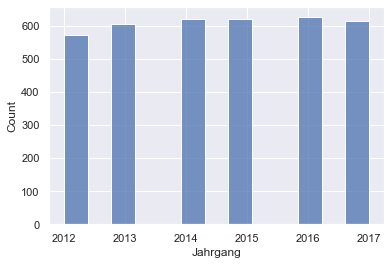

In [20]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=mySelection, x="Jahrgang") # , y="SexLang")
plt.show();

Test: Choroplethenkarte

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html